# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:

# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
      # Stop processing when reaching set 13 and record 22
    if set_count > 13 or (set_count == 13 and record_count > 22):
        break

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | sauk rapids
Processing Record 7 of Set 1 | aykhal
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | yoakum
Processing Record 10 of Set 1 | sabang
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | alotau
City not found. Skipping...
Processing Record 13 of Set 1 | kingston
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | kendari
Processing Record 16 of Set 1 | revda
Processing Record 17 of Set 1 | khandyga
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | camabatela
Processing Record 20 of Set 1 | tayshet
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | isafjordur

Processing Record 42 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 43 of Set 4 | nogliki
Processing Record 44 of Set 4 | kailua-kona
Processing Record 45 of Set 4 | krutinka
Processing Record 46 of Set 4 | el bolson
Processing Record 47 of Set 4 | port mathurin
Processing Record 48 of Set 4 | porto novo
Processing Record 49 of Set 4 | klyuchi
Processing Record 0 of Set 5 | monrovia
Processing Record 1 of Set 5 | gargalianoi
Processing Record 2 of Set 5 | taltal
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | mount gambier
Processing Record 5 of Set 5 | rada tilly
Processing Record 6 of Set 5 | kaga bandoro
Processing Record 7 of Set 5 | tanki leendert
City not found. Skipping...
Processing Record 8 of Set 5 | yatou
Processing Record 9 of Set 5 | vorgashor
Processing Record 10 of Set 5 | koutiala
Processing Record 11 of Set 5 | mezhdurechenskiy
Processing Record 12 of Set 5 | tura
Processing Record 13 of Set 5 | san antonio de pale
Processing R

Processing Record 29 of Set 8 | alice springs
Processing Record 30 of Set 8 | tralee
Processing Record 31 of Set 8 | vikhorevka
Processing Record 32 of Set 8 | pamanukan
Processing Record 33 of Set 8 | bubaque
Processing Record 34 of Set 8 | ixtapa
Processing Record 35 of Set 8 | berbera
Processing Record 36 of Set 8 | bandon
Processing Record 37 of Set 8 | qorovulbozor
Processing Record 38 of Set 8 | maragogi
Processing Record 39 of Set 8 | sur
Processing Record 40 of Set 8 | gadzhiyevo
Processing Record 41 of Set 8 | zhangjiajie
Processing Record 42 of Set 8 | bandar lampung
Processing Record 43 of Set 8 | weinan
Processing Record 44 of Set 8 | cruzeiro do sul
Processing Record 45 of Set 8 | puerto armuelles
Processing Record 46 of Set 8 | nova vicosa
Processing Record 47 of Set 8 | san rafael del yuma
Processing Record 48 of Set 8 | vernon
Processing Record 49 of Set 8 | new norfolk
Processing Record 0 of Set 9 | caleta olivia
Processing Record 1 of Set 9 | al 'alamayn
City not foun

Processing Record 17 of Set 12 | lethem
Processing Record 18 of Set 12 | semera
Processing Record 19 of Set 12 | soe
Processing Record 20 of Set 12 | lionel town
Processing Record 21 of Set 12 | puerto rosario
Processing Record 22 of Set 12 | tazacorte
Processing Record 23 of Set 12 | rurrenabaque
Processing Record 24 of Set 12 | kievka
Processing Record 25 of Set 12 | rumphi
Processing Record 26 of Set 12 | inari
Processing Record 27 of Set 12 | cornwall
Processing Record 28 of Set 12 | hithadhoo
Processing Record 29 of Set 12 | murzuq
Processing Record 30 of Set 12 | san jose village
City not found. Skipping...
Processing Record 31 of Set 12 | nouadhibou
Processing Record 32 of Set 12 | timbuktu
Processing Record 33 of Set 12 | phan thiet
Processing Record 34 of Set 12 | bardai
Processing Record 35 of Set 12 | zadar
Processing Record 36 of Set 12 | szprotawa
Processing Record 37 of Set 12 | sinop
Processing Record 38 of Set 12 | praia da vitoria
Processing Record 39 of Set 12 | vohip

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,7.81,66,20,4.63,AR,1699597010
1,ribeira grande,38.5167,-28.7000,20.99,96,58,9.39,PT,1699597284
2,albany,42.6001,-73.9662,6.56,82,100,2.46,US,1699597285
3,thompson,55.7435,-97.8558,-10.91,92,100,0.00,CA,1699597286
4,grytviken,-54.2811,-36.5092,1.87,95,100,2.79,GS,1699597287


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,7.81,66,20,4.63,AR,1699597010
1,ribeira grande,38.5167,-28.7000,20.99,96,58,9.39,PT,1699597284
2,albany,42.6001,-73.9662,6.56,82,100,2.46,US,1699597285
3,thompson,55.7435,-97.8558,-10.91,92,100,0.00,CA,1699597286
4,grytviken,-54.2811,-36.5092,1.87,95,100,2.79,GS,1699597287


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

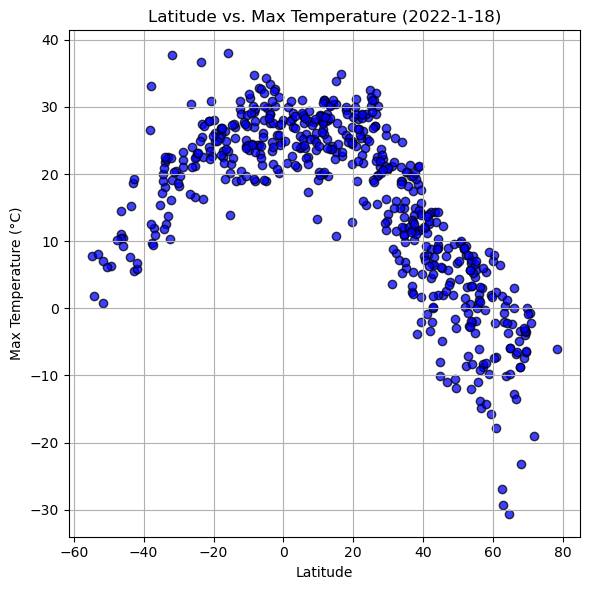

In [9]:
# Build scatter plot for latitude vs. temperature
latitudes = [city["Lat"] for city in city_data]
temperatures = [city["Max Temp"] for city in city_data]

# Incorporate the other graph properties
plt.figure(figsize=(6,6))
plt.scatter(latitudes, temperatures, color='blue', edgecolors='black', alpha=0.75)
plt.title('Latitude vs. Max Temperature (2022-1-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

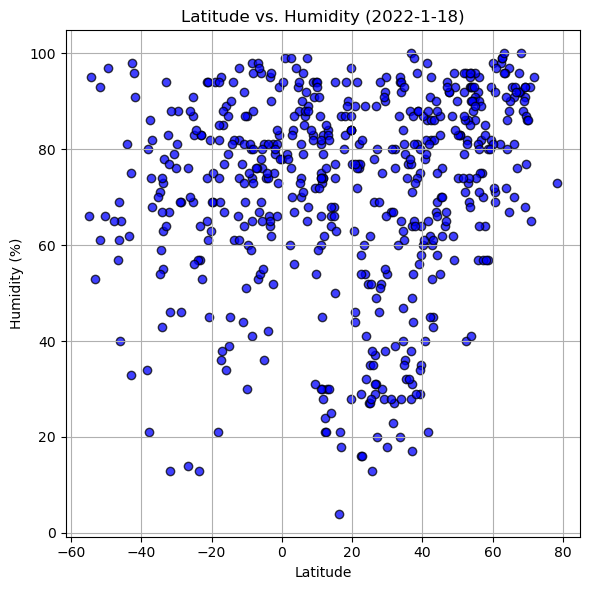

In [10]:
# Build the scatter plots for latitude vs. humidity
latitudes = [city["Lat"] for city in city_data]
humidities = [city["Humidity"] for city in city_data]

# Incorporate the other graph properties
plt.figure(figsize=(6,6))
plt.scatter(latitudes, humidities, color='blue', edgecolors='black', alpha=0.75)
plt.title('Latitude vs. Humidity (2022-1-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

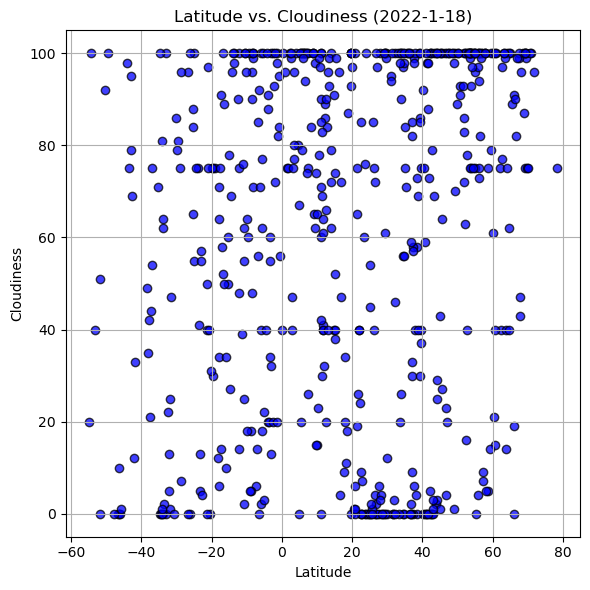

In [11]:
# Build the scatter plots for latitude vs. cloudiness
latitudes = [city["Lat"] for city in city_data]
cloudiness = [city["Cloudiness"] for city in city_data]

# Incorporate the other graph properties
plt.figure(figsize=(6,6))
plt.scatter(latitudes, cloudiness, color='blue', edgecolors='black', alpha=0.75)
plt.title('Latitude vs. Cloudiness (2022-1-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

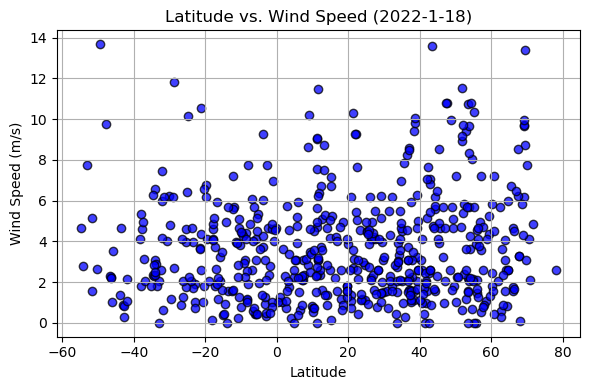

In [12]:
# Build the scatter plots for latitude vs. wind speed
latitudes = [city["Lat"] for city in city_data]
Wind_Speed= [city["Wind Speed"] for city in city_data]

# Incorporate the other graph properties
plt.figure(figsize=(6,4))
plt.scatter(latitudes, Wind_Speed, color='blue', edgecolors='black', alpha=0.75)
plt.title('Latitude vs. Wind Speed (2022-1-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def Linear_fun(X,y):    
    latitude_data = [X["Lat"] for city in X]
    temp_data = [X[y] for city in X]

    # Extract numerical values from DataFrame columns
    latitude_data = X["Lat"].values.reshape(-1, 1)
    temp_data = X[y].values.reshape(-1, 1)

    # Calculate the correlation coefficient between latitude and max temperature
    correlation_coefficient, _ = pearsonr(X["Lat"], X[y])
    print(f"The r-value is: {correlation_coefficient:}")

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(latitude_data, temp_data)

    # Get the coefficients (slope and intercept)
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]

    # Generate predictions using the linear regression model
    predictions = model.predict(latitude_data)

    # Plot the linear regression line and data points
    plt.figure(figsize=(6, 6))
    plt.scatter(latitude_data, temp_data, color='blue')
    plt.plot(latitude_data, predictions, color='red', linewidth=2)
    plt.xlabel("Latitude")
    plt.ylabel(y)


    equation_text = f"Y= {slope:.2f}x+ {intercept:.2f}"
    plt.annotate(equation_text,xy=(0.1,0.9),xycoords='axes fraction',fontsize=12, color='red')

    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_data=city_data_df[(city_data_df.Lat>=0)]
northern_hemi_df=pd.DataFrame(northern_data)

# # Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ribeira grande,38.5167,-28.7000,20.99,96,58,9.39,PT,1699597284
2,albany,42.6001,-73.9662,6.56,82,100,2.46,US,1699597285
3,thompson,55.7435,-97.8558,-10.91,92,100,0.00,CA,1699597286
5,sauk rapids,45.5919,-94.1661,1.99,76,100,4.63,US,1699597287
6,aykhal,66.0000,111.5000,-12.71,91,91,1.75,RU,1699597288


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_data=city_data_df[(city_data_df.Lat<0)]
southern_hemi_df=pd.DataFrame(southern_data)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,7.81,66,20,4.63,AR,1699597010
4,grytviken,-54.2811,-36.5092,1.87,95,100,2.79,GS,1699597287
10,waitangi,-43.9535,-176.5597,7.68,81,98,1.34,NZ,1699597290
13,kendari,-3.9450,122.4989,33.46,42,20,3.74,ID,1699597292
16,edinburgh of the seven seas,-37.0676,-12.3116,11.98,68,54,3.13,SH,1699597292


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8674235092295747


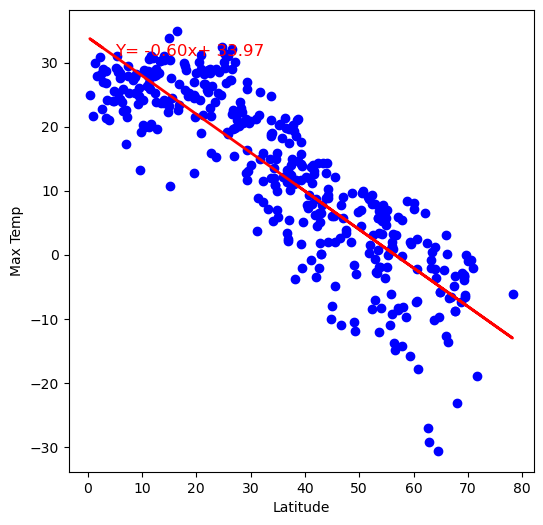

In [16]:
# Linear regression on Northern Hemisphere
Linear_fun(northern_hemi_df,"Max Temp")

The r-value is: 0.7274839503716897


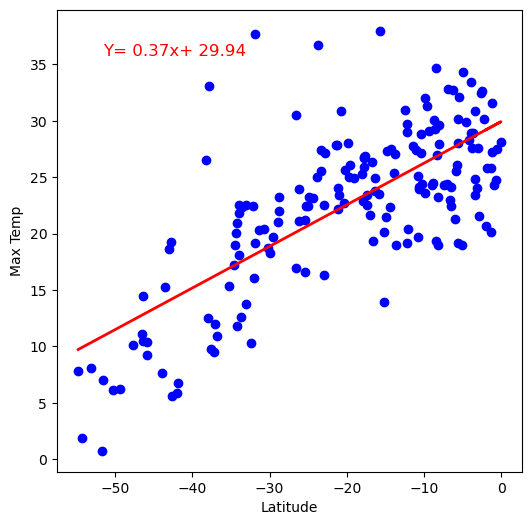

In [17]:
# Linear regression on Southern Hemisphere
Linear_fun(southern_hemi_df,"Max Temp")

**Discussion about the linear relationship:** 

For Northern Hemisphere : R value is negative and weak correlation between latitude and Temperature.When latitude is increasing then Temperature is decreasing .Temperature decreases usually when it move away from the equator towards the poles

For Southern Hemisphere : R value is positive and positive correlation between latitude and Temperature.when latitude is increasing then temperature is increasing .

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23282972795690787


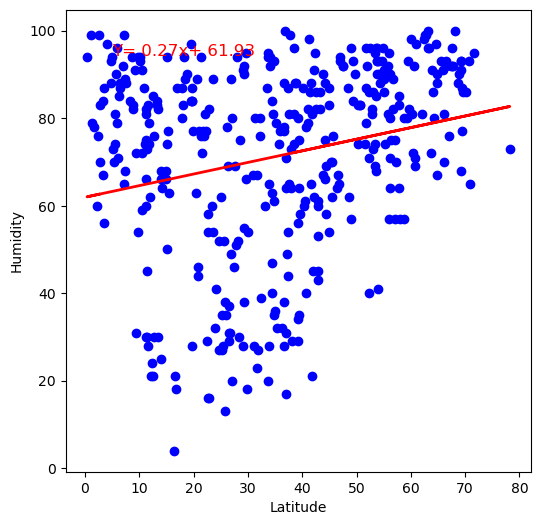

In [18]:
# Northern Hemisphere
Linear_fun(northern_hemi_df,"Humidity")

The r-value is: 0.1161592345748595


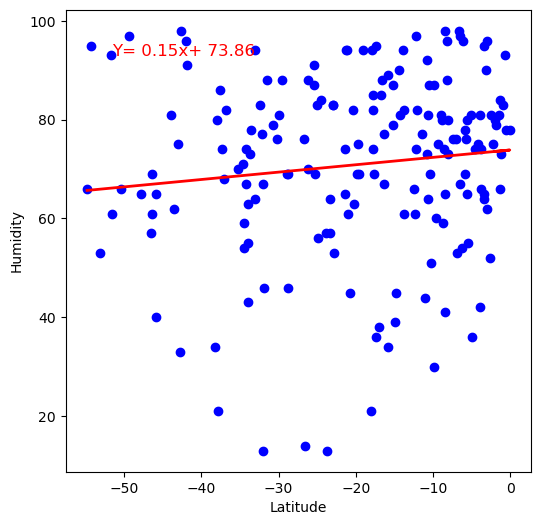

In [19]:
# Southern Hemisphere
Linear_fun(southern_hemi_df,"Humidity")

**Discussion about the linear relationship:** 

For Northern hemisphere : R value is near to Zero.Correlation between Latitude and humidity is slightly increasing and its weak positive relation.

For Southern hemisphere : R value is near to Zero.Correlation between Latitude and humidity is slightly increasing and its weak positive relation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11730341201769029


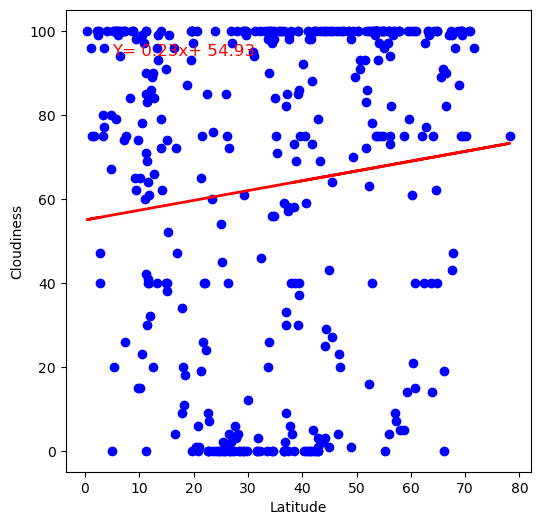

In [20]:
# Northern Hemisphere
Linear_fun(northern_hemi_df,"Cloudiness")

The r-value is: 0.21364615150595825


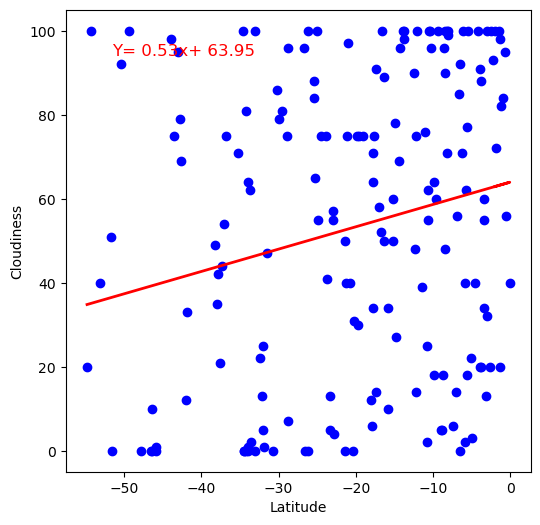

In [21]:
# Southern Hemisphere
Linear_fun(southern_hemi_df,"Cloudiness")

**Discussion about the linear relationship:** 

For Northern hemisphere : R value is near to Zero.Correlation between Latitude and cloudiness is slightly increasing and its weak positive relation.

For Southern hemisphere : R value is near to Zero.Correlation between Latitude and cloudiness is slightly increasing and its weak positive relation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14619117058861444


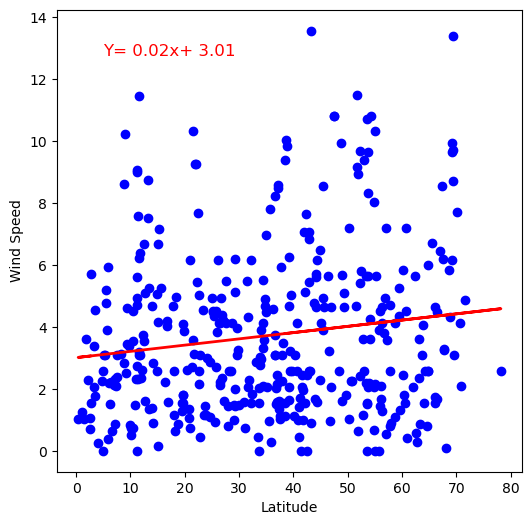

In [22]:
# Northern Hemisphere
Linear_fun(northern_hemi_df,"Wind Speed")

The r-value is: -0.07879712469844546


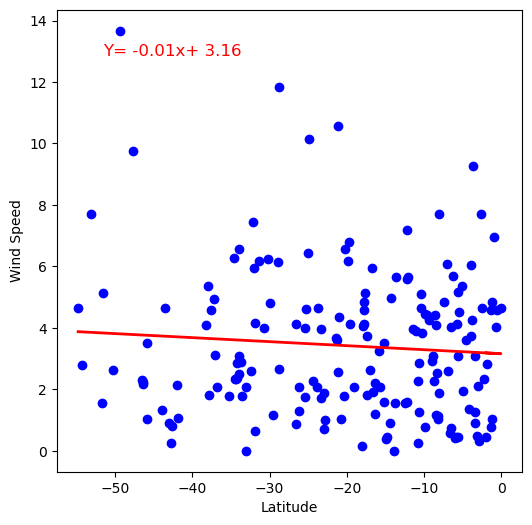

In [23]:
# Southern Hemisphere
Linear_fun(southern_hemi_df,"Wind Speed")

**Discussion about the linear relationship:**

For Northern hemisphere : R value is near to Zero.Correlation between Latitude and wind speed is slightly increasing and its weak positive relation.

For Southern hemisphere : R value is negative.Correlation between Latitude and wind speed is slightly decreasing and its weak negative relation.